# Winter 2022 Data Science Intern Challenge

In [2]:
#Imports
import pandas as pd

## Question 1

*Given 2019 Winter Data Science Intern Challenge Data Set.xlsx data, write a program to answer the following:*

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the **average order value (AOV)**. When we look at **orders data over a 30 day window, we naively calculate an AOV of $3145.13**. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  

After glancing at the provided dataset and the provided explanation, I have made note of the following: 
* Our analysis(the description) implies that the Average Orders Value \$3145.13 is unreasonable since sneakers are relatively affordable items. However, it is important to note that Average Price of Sneakers(APS) and Average Orders Value(AOV) are not equal, thus Average Orders Value is not a reliable estimator for Average Price of Sneakers. 
* While APS and AOV are not equal, it is still true that an AOV of \$3145.13 is a bit too great. This can mean that either one of sneaker pairs are very expensive or costumers are placing very large orders at these stores, thus leading to some outlier data points that are heavily skewing the AOV. If neither of these are the case, there are errors in the data sheet that should be cleared before further processing and analysis.
    

For better way to analyse this data to begin with would be to examine its distribution. This will tell us if the data is skewed and if we have any outliers. 

Below, I have written code to provide a brief information size of the dataset, datatypes and checked for any null values. Then I have plotted a boxplot to examine the distribution of Order Amount. (A histogram can also be used to examine distribution of this data.)



In [25]:
def info(df):
  print("Number of Rows: "+str(df.shape[0]))
  print("\nNumber of Columns: "+str(df.shape[1]))
  print("\nNames and Data Types of Columns: \n")
  print(df.dtypes)
  print("\nAny Null values: "+str(df.isnull().values.any()))


def read_into_df(fp):
  df = pd.read_excel(fp, header=0)
  return df


sneakers_data_fp = '2019 Winter Data Science Intern Challenge Data Set.xlsx'
sneakers_data = read_into_df(sneakers_data_fp)
info(sneakers_data)

Number of Rows: 5000

Number of Columns: 7

Names and Data Types of Columns: 

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

Any Null values: False


<AxesSubplot:>

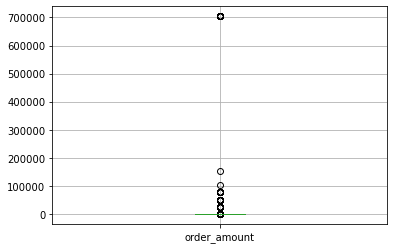

In [19]:
sneakers_data.boxplot(column = 'order_amount') 

In [27]:
q = sneakers_data['order_amount'].quantile(0.99)
sneakers_data[sneakers_data['order_amount'] < q]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190022
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999116
2,3,44,861,144,1,cash,2017-03-14 04:23:55.594730
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.596993
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389130
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228042
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.187847


<AxesSubplot:>

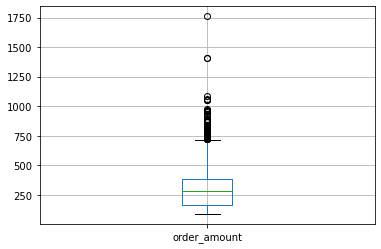

In [29]:
sneakers_data_filtered = sneakers_data[sneakers_data['order_amount'] < q]
sneakers_data_filtered.boxplot(column = 'order_amount') 

* What metric would you report for this dataset?
* What is its value?